In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('Sept_2021_Sept_2022.csv', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953156 entries, 0 to 5953155
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   ride_id                object 
 2   rideable_type          object 
 3   start_station_name     object 
 4   start_station_id       object 
 5   end_station_name       object 
 6   end_station_id         object 
 7   member_casual          object 
 8   duration               object 
 9   weekday                int64  
 10  hour                   int64  
 11  month                  int64  
 12  year                   int64  
 13  distance (Km)          float64
 14  distance Rounded (Km)  float64
dtypes: float64(2), int64(5), object(8)
memory usage: 681.3+ MB


In [52]:
df.describe()

,Unnamed: 0,weekday,hour,month,year,distance (Km),distance Rounded (Km)
count,5.953156e+06,5.953156e+06,5.953156e+06,5.953156e+06,5.953156e+06,5.947201e+06,5.947201e+06
mean,2.976578e+06,3.061329e+00,1.425455e+01,7.149335e+00,2.021771e+03,2.157367e+00,2.156825e+00
std,1.718528e+06,1.970283e+00,5.035021e+00,2.467692e+00,4.202318e-01,2.015727e+00,2.016127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.021000e+03,0.000000e+00,0.000000e+00
25%,1.488289e+06,1.000000e+00,1.100000e+01,5.000000e+00,2.022000e+03,8.824964e-01,9.000000e-01
50%,2.976578e+06,3.000000e+00,1.500000e+01,7.000000e+00,2.022000e+03,1.599697e+00,1.600000e+00
75%,4.464866e+06,5.000000e+00,1.800000e+01,9.000000e+00,2.022000e+03,2.828004e+00,2.800000e+00
max,5.953155e+06,6.000000e+00,2.300000e+01,1.200000e+01,2.022000e+03,1.189895e+03,1.189900e+03


In [53]:
#count value
member_casual = df['member_casual'].value_counts()
member_casual

member    3445222
casual    2507934
Name: member_casual, dtype: int64

In [54]:
# count date
date_count = df['weekday'].value_counts()
date_count

5    953459
3    889956
2    850709
4    847595
1    816490
6    813186
0    781761
Name: weekday, dtype: int64

In [55]:
weekdays = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
member_ride_per_day = []
casual_ride_per_day = []
weekdays_number = []
for i in range(7):
    weekdays_number.append(i)
    a = len(df[(df['member_casual']=='member') & (df['weekday']==i)])
    member_ride_per_day.append(a)
    b = len(df[(df['member_casual']=='casual') & (df['weekday']==i)])
    casual_ride_per_day.append(b)
user_on_day = np.vstack((weekdays_number, weekdays, member_ride_per_day, casual_ride_per_day))


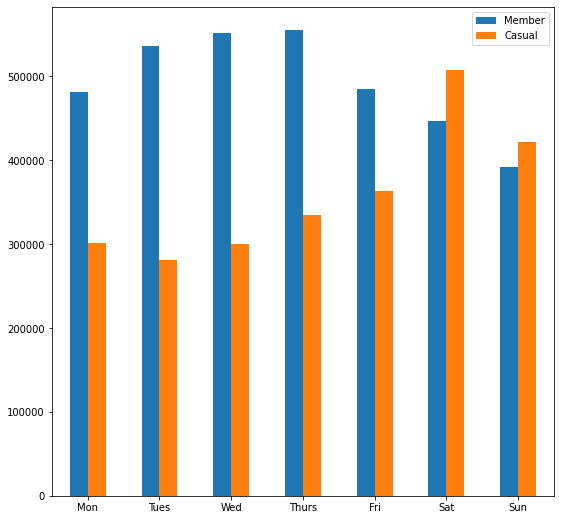

In [76]:
# plot the difference between casual and member ride on week day
member_vs_casual_wd = pd.DataFrame({'Member':member_ride_per_day,
                       'Casual':casual_ride_per_day,},
                       index = weekdays)
ax = member_vs_casual_wd.plot.bar(figsize = (9,9), rot=0)
## Analysis: Casual ride spikes up during the weekend (saturday and sunday)

In [57]:
df.head()

,Unnamed: 0,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,duration,weekday,hour,month,year,distance (Km),distance Rounded (Km)
0,0,9DC7B962304CBFD8,electric_bike,NaN,NaN,NaN,NaN,casual,0 days 00:02:44,1,16,9,2021,0.828026,0.8
1,1,F930E2C6872D6B32,electric_bike,NaN,NaN,NaN,NaN,casual,0 days 00:15:14,1,14,9,2021,5.094354,5.1
2,2,6EF72137900BB910,electric_bike,NaN,NaN,NaN,NaN,casual,0 days 00:03:41,1,0,9,2021,1.112298,1.1
3,3,78D1DE133B3DBF55,electric_bike,NaN,NaN,NaN,NaN,casual,0 days 00:08:49,1,14,9,2021,1.112298,1.1
4,4,E03D4ACDCAEF6E00,electric_bike,NaN,NaN,NaN,NaN,casual,0 days 00:10:32,1,9,9,2021,2.484467,2.5


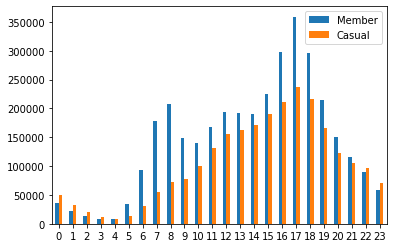

In [58]:
# renting hour difference bewteen member and casual
hour_of_day = []
casual_renting_hour = []
member_renting_hour = []
for i in range(24):
    hour_of_day.append(i)
    c = len(df[(df['member_casual']=='casual') & (df['hour']==i)])
    m = len(df[(df['member_casual']=='member') & (df['hour']==i)])
    casual_renting_hour.append(c)
    member_renting_hour.append(m)

member_vs_casual_renting_hour = pd.DataFrame({'Member':member_renting_hour,
                       'Casual':casual_renting_hour,},
                       index = hour_of_day)


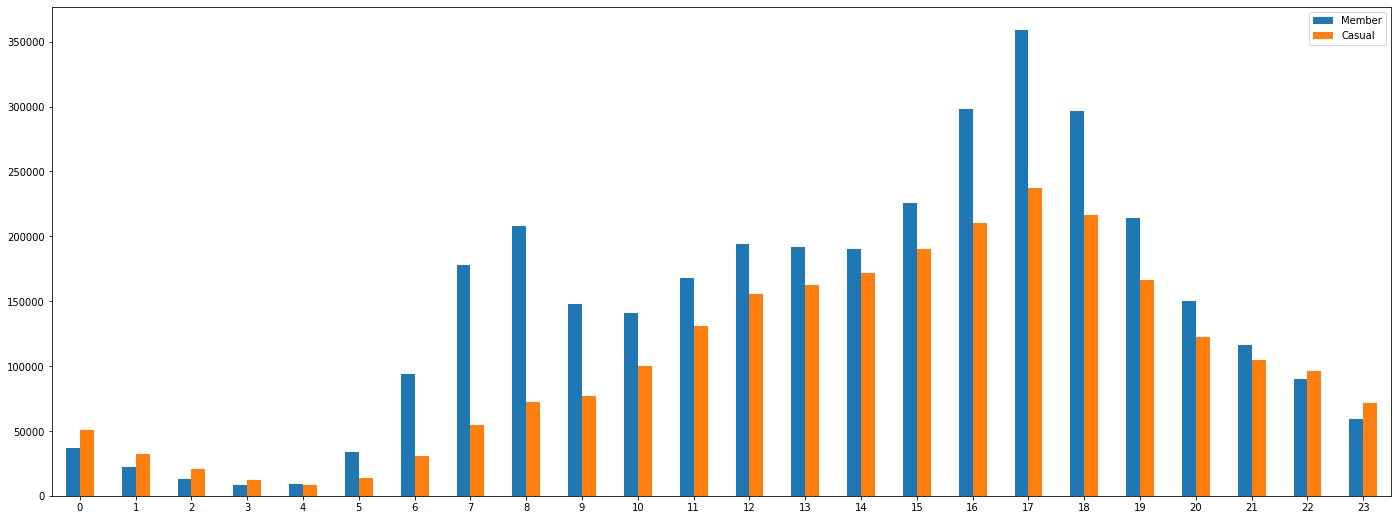

In [78]:
ax = member_vs_casual_renting_hour.plot.bar(figsize=(24, 9), rot=0)
# Analysis:
# Member ride spikes up from 6AM and reduces at 6PM
# Casual ride rises slower till 5-6PM and then reduces

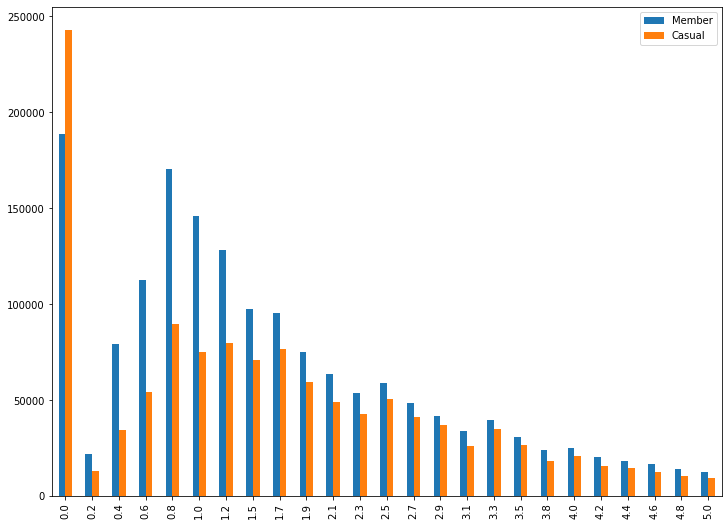

In [79]:
# Distance travel difference between member and casual
distances = np.linspace(0, 5, 25)
distances = np.around(distances, 1)
casual_dist_ride = []
member_dist_ride = []
for i in distances:
    c = len(df[(df['member_casual']=='casual') & (df['distance Rounded (Km)']==i)])
    m = len(df[(df['member_casual']=='member') & (df['distance Rounded (Km)']==i)])
    casual_dist_ride.append(c)
    member_dist_ride.append(m)

member_vs_casual_dist_ride = pd.DataFrame({'Member':member_dist_ride,
                       'Casual':casual_dist_ride,},
                       index = distances)



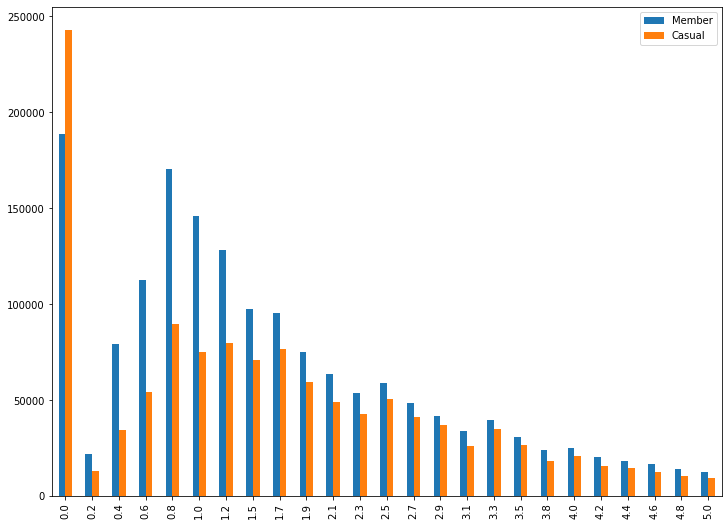

In [80]:
ax = member_vs_casual_dist_ride.plot.bar(figsize=(12,9),rot=90)
# Analysis:
# A lot of riders take a trip less than 200m
# More member rides than casual rides at a distance of less than 2Km.
# Over 2Km both types share the same number of rides.

In [74]:
# Note: don't use aggregate function, it's super slow.
df['month'] = df['month'].astype(str)
df['year'] = df['year'].astype(str)
df['month-year'] = df['month'] + "-" + df['year']

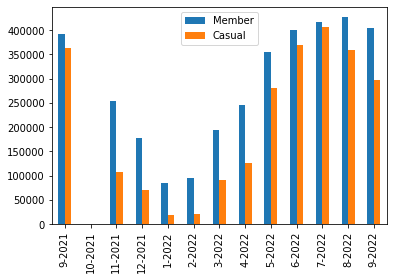

In [75]:
monthyear = ['9-2021', '10-2021', '11-2021', '12-2021', 
          '1-2022', '2-2022', '3-2022', '4-2022', 
          '5-2022', '6-2022', '7-2022', '8-2022',
          '9-2022']
casual_month_ride = []
member_month_ride = []
for i in monthyear:
    c = len(df[(df['member_casual']=='casual') & (df['month-year']==i)])
    m = len(df[(df['member_casual']=='member') & (df['month-year']==i)])
    casual_month_ride.append(c)
    member_month_ride.append(m)

member_vs_casual_month_ride = pd.DataFrame({'Member':member_month_ride,
                       'Casual':casual_month_ride,},
                       index = monthyear)


In [ ]:
ax = member_vs_casual_month_ride.plot.bar(figsize=(12,9),rot=90)
# Analysis
# Monthly ride shows that demands for rental rises form May and decline from August <-- The winter is coming
# Casual riders peaked up from May while remain moderate from November to December to April

In [73]:
df['month-year']

0          9-2021
1          9-2021
2          9-2021
3          9-2021
4          9-2021
            ...  
5953151    9-2022
5953152    9-2022
5953153    9-2022
5953154    9-2022
5953155    9-2022
Name: month-year, Length: 5953156, dtype: object